In [186]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Exploración de Datos

In [187]:
dfToUse = "importacion"

def returnQuantRows(dfToUse):
    if (dfToUse == 'consumo'):
        return 269 
    return 257

toUse = returnQuantRows(dfToUse)

In [188]:
df = pd.read_excel(dfToUse+'.xlsx', engine='openpyxl')
df = df[['Fecha', 'Gasolina superior', 'Gasolina regular', 'Diesel']]

In [189]:
df = df[:257]
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [190]:
df

,Fecha,Gasolina superior,Gasolina regular,Diesel
0,2001-01-01,373964,177776,566102
1,2001-02-01,243091,123116,489526
2,2001-03-01,312084,161726,575560
3,2001-04-01,285055,127339,437745
4,2001-05-01,300914,168730,552609
...,...,...,...,...
252,2022-01-01,947208,848903,1.44257e+06
253,2022-02-01,673654,723926,1.2175e+06
254,2022-03-01,592318,772406,1.26207e+06
255,2022-04-01,493952,906104,1.28849e+06


In [191]:
quant_vars = ['Gasolina superior', 'Gasolina regular', 'Diesel']
df[quant_vars].astype(int).describe()

,Gasolina superior,Gasolina regular,Diesel
count,2.570000e+02,257.000000,2.570000e+02
mean,4.735216e+05,361664.957198,8.496109e+05
std,1.543325e+05,201498.229683,2.724270e+05
min,1.702920e+05,81015.000000,2.297640e+05
25%,3.608070e+05,201213.000000,6.694620e+05
50%,4.459200e+05,291087.000000,8.168400e+05
75%,5.732200e+05,510830.000000,1.029100e+06
max,1.227173e+06,906104.000000,1.630635e+06


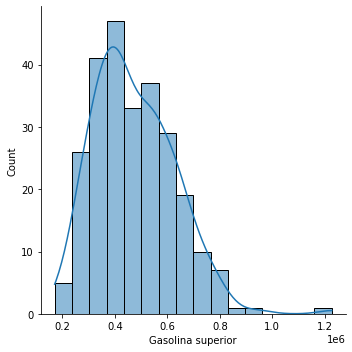

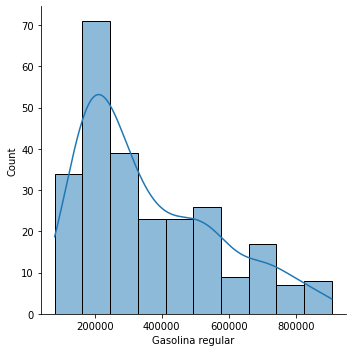

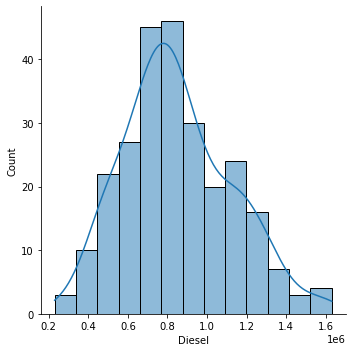

In [192]:
for var in quant:
    data = df[var].dropna(how='all', axis=0)
    
    # Gráfico
    sns.displot(data, kde=True)

# Por año

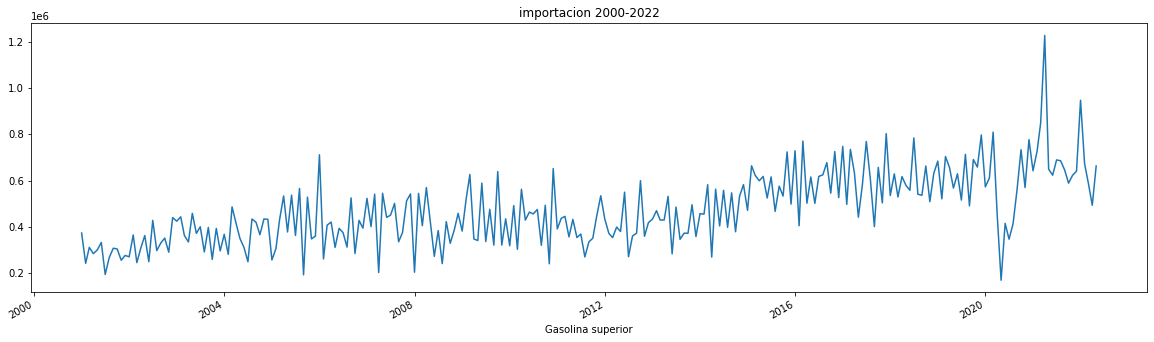

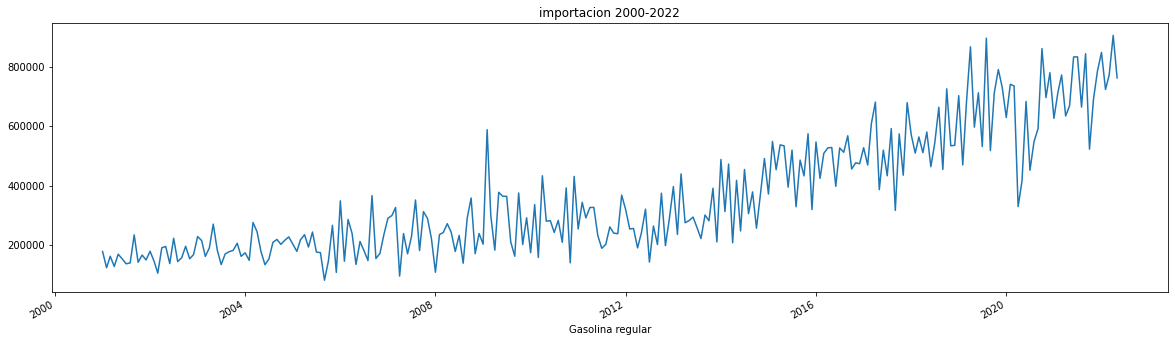

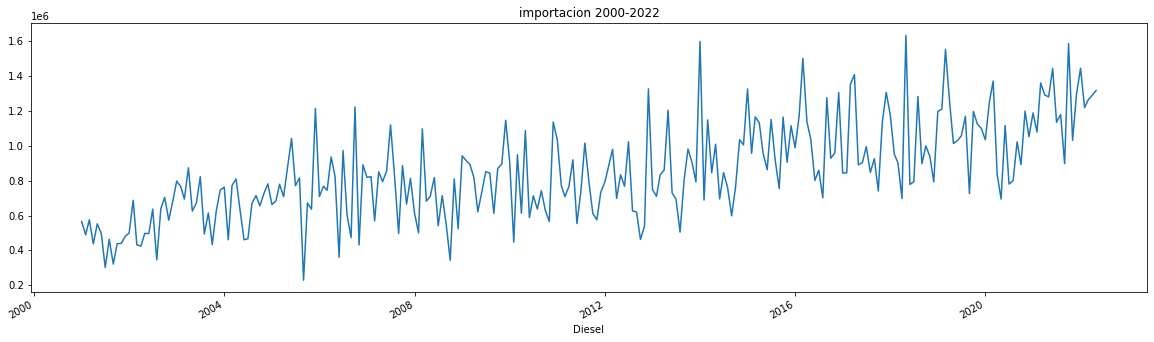

In [193]:
plt.rcParams["figure.figsize"] = (20,5.5)

for gas in quant_vars:
    x = df['Fecha']
    y = df[gas]

    plt.title(dfToUse+" 2000-2022")
    # beautify the x-labels
    plt.gcf().autofmt_xdate()
    plt.xlabel(gas)


    plt.plot(x, y)
    plt.show()

# Por mes

In [194]:
dfPerMonth = df.groupby(df['Fecha'].dt.month)
dfPerMonth = dfPerMonth.sum()

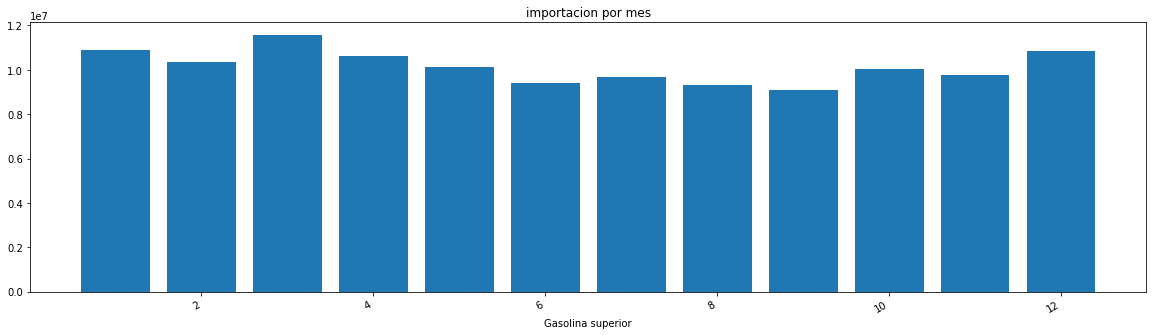

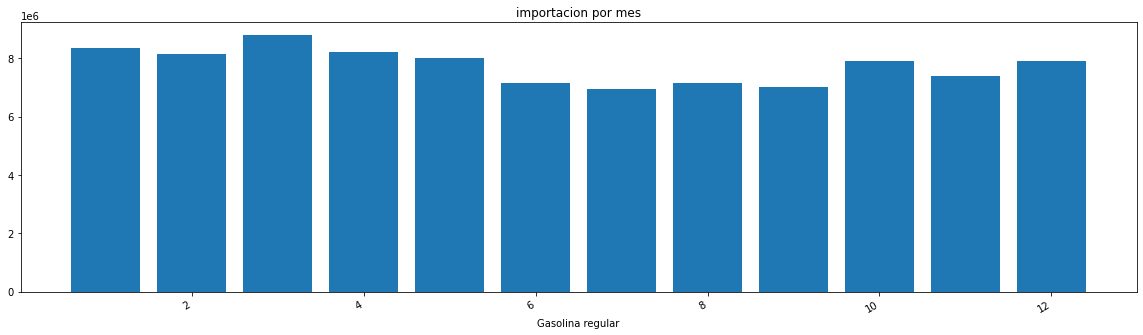

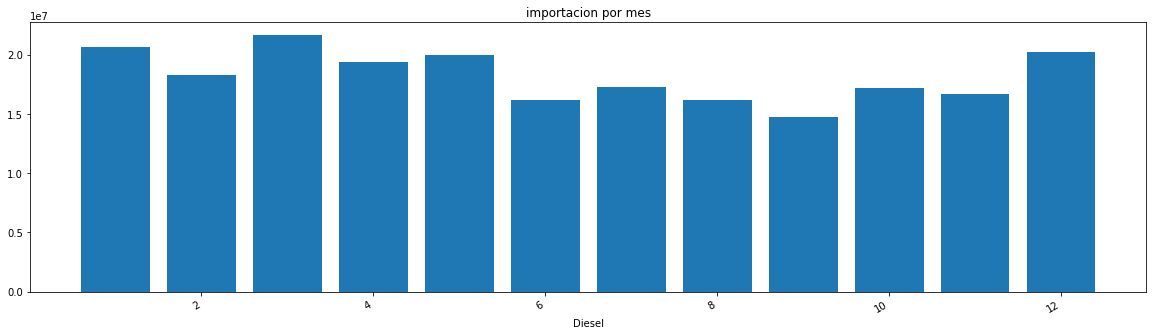

In [195]:
plt.rcParams["figure.figsize"] = (20,5.5)

for gas in quant_vars:
    x = dfPerMonth.index
    y = dfPerMonth[gas]


    plt.title(dfToUse+" por mes")
    # beautify the x-labels
    plt.gcf().autofmt_xdate()
    plt.xlabel(gas)


    plt.bar(x, y)
    plt.show()

# Comportamiento en la pandemia

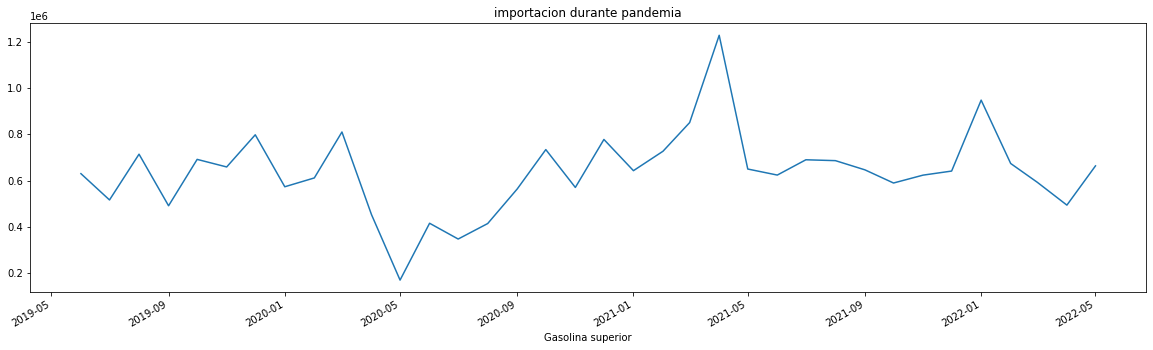

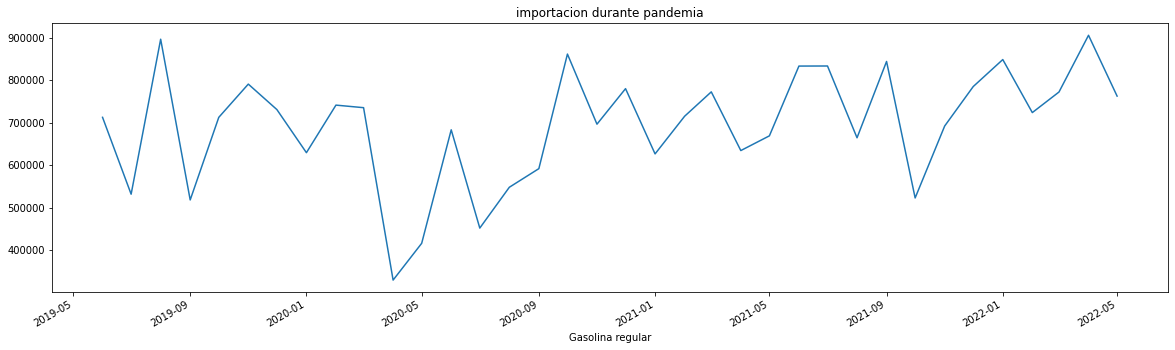

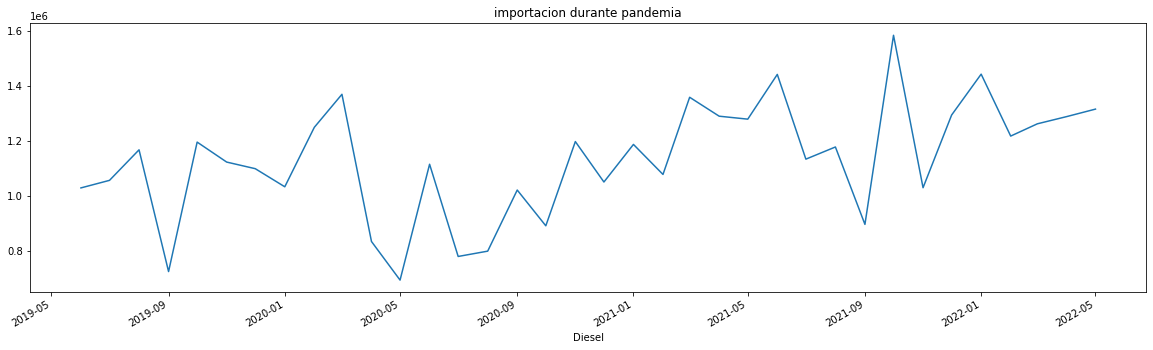

In [196]:
plt.rcParams["figure.figsize"] = (20,5.5)
quant_to_have = 12

for gas in quant_vars:
    x = df['Fecha'].tail(quant_to_have * 3)
    y = df[gas].tail(quant_to_have * 3)

    plt.title(dfToUse+" durante pandemia")
    # beautify the x-labels
    plt.gcf().autofmt_xdate()
    plt.xlabel(gas)


    plt.plot(x, y)
    plt.show()